#  Projectile Motion Simulation (Euler’s Method)

This notebook is something I put together to explore projectile motion using both physics equations and coding. 

Projectile motion describes the motion of an object thrown into the air under the influence of gravity.  
It follows a parabolic path because the horizontal velocity is constant while the vertical one changes due to acceleration due to gravity.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Why I used these?  
- `numpy` → for handling numbers and arrays easily.  
- `matplotlib.pyplot` → for plotting the trajectory graph.  
- `FuncAnimation` (from matplotlib) → to animate the projectile motion.  
- `HTML` (from IPython.display) → to show the animation inside the notebook. 

Here we are gonna use the **Semi implicit Euler integration**  
because it's simpler, works well if *dt* is small and it's generally used in simulations.

In [11]:
class Particle:
  def __init__(self, position = None, velocity = None, acceleration = None):
    self.position = np.array(position if position is not None else [0, 0])
    self.acceleration = np.array(acceleration if acceleration is not None else [0, 0])
    self.velocity = np.array(velocity if velocity is not None else [0, 0])

  def update(self, dt): # semi-implicit Euler integration.
    self.velocity = self.velocity + self.acceleration * dt
    self.position = self.position + self.velocity * dt

In real physics equations, displacement in the vertical direction includes the term:

$$
y(t) = y_0 + v_y t - \tfrac{1}{2} g t^2
$$

Here, the $(\tfrac{1}{2} g t^2)$ comes from the fact that acceleration changes velocity continuously.

### Euler Method (for Simulation) (just for approximation)

In the simulation, we used the **Euler integration method**, which updates velocity and position step by step:

$$
\begin{aligned}
v(t + \Delta t) &= v(t) + a \Delta t \\
x(t + \Delta t) &= x(t) + v(t + \Delta t) \Delta t
\end{aligned}
$$

Euler is simpler but approximate. It does not explicitly include the $(\tfrac{1}{2} a t^2)$ term.  

This is fine for basic cases, but since it skips the $(\tfrac{1}{2} a t^2)$ part, the result won’t be exact.  
Over time, the small mistakes add up, which is why it’s only an approximation.


### The Analytical Trajectory

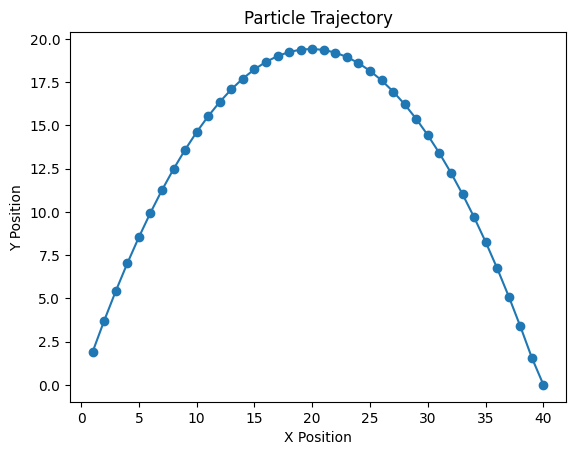

In [12]:
p = Particle([0,0], [10,20], [0,-9.8])
dt = 0.1

pos = [] # this collects the trajectory points

while True:
  p.update(dt)
  if p.position[1] < 0:
      p.position[1] = 0
      pos.append(p.position.copy())
      break
  pos.append(p.position.copy())

xp = [p[0] for p in pos]
yp = [p[1] for p in pos]

plt.plot(xp, yp, marker = "o")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Particle Trajectory")
plt.show()

### Why Do We Get a Parabola?

The **x-position** changes with constant velocity (no horizontal acceleration)  
The **y-position** is affected by gravity
If you eliminate \(t\), the relation between \(x\) and \(y\) becomes **quadratic**.  
That’s why the trajectory is a **parabola** as the particle moves forward steadily $x$ but curves downward $y$ due to gravity.


In [20]:
p = Particle([0,0], [10,20], [0,-9.8])
dt = 0.1

fig, ax = plt.subplots()
ax.set_xlim(0, 40)
ax.set_ylim(0, 25)

dot, = ax.plot([], [], 'ro', markersize = 8)

line, = ax.plot([], [], 'b-')

x_data, y_data = [], []
plt.close(fig)

In [21]:
def init(): # clears the particle’s position at the start of animation
    dot.set_data([], [])
    line.set_data([], [])
    return dot, line

def update(frame): # this fn updates the particle's frame
    p.update(dt)
    x_data.append(p.position[0])
    y_data.append(p.position[1])

    dot.set_data([p.position[0]], [p.position[1]])
    line.set_data(x_data, y_data)
    return dot,

In [15]:
anim = FuncAnimation(fig, update, frames=100, init_func=init, interval=50)
plt.close(fig)
HTML(anim.to_jshtml())

## In conclusion...

I learned pretty good things while working on this project. I learned how to write basic classes in Python, and then I got to work with Matplotlib, and I got to know more modules like `FuncAnimation`. So this is not just a quick thing. I learned a lot while working on this mini-task that I did for myself where I included a bit of physics.  

I also got to learn a bit of Euler's method. The maths can be intimidating, but still I enjoyed doing this mini project.  

### About mee!

I’m Vinaya Sangeeta Lahari, a 2nd year CSE student at GITAM University.  
I enjoy building mini projects that mix **Physics and CS** while learning coding, math, and problem-solving along the way.   

Feel free to connect with me on LinkedIn if you liked my work! 

### Connect with me!
[Linkedin]( https://www.linkedin.com/in/vinaya-sangeeta-lahari-baswa-027892316/)  
[GitHub](https://github.com/bvslahari007)  